##  Flight Price Prediction

Size of training set: **10683** records

Size of test set: **2671** records

FEATURES:

- Airline: The name of the airline.


- Date_of_Journey: The date of the journey


- Source: The source from which the service begins.


- Destination: The destination where the service ends.


- Route: The route taken by the flight to reach the destination.


- Dep_Time: The time when the journey starts from the source.


- Arrival_Time: Time of arrival at the destination.


- Duration: Total duration of the flight.


- Total_Stops: Total stops between the source and destination.


- Additional_Info: Additional information about the flight


- Price: The price of the ticket

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_train= pd.read_excel('Data_Train.xlsx',parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'])
df_test= pd.read_excel('Test_set.xlsx',parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'])

Checking the first 5 rows of train and test dataset

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-19 05:50:00,2021-06-19 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-19 18:05:00,2021-06-19 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-19 16:50:00,2021-06-19 21:35:00,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-06-19 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-06-19 06:20:00,2021-06-19 10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-06-19 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-06-19 08:00:00,2021-06-19 21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-06-19 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info


####  Shape of the dataset:

In [5]:
print("The Train dataset shape is : ",df_train.shape)
print("The Test dataset shape is : ",df_test.shape)

The Train dataset shape is :  (10683, 11)
The Test dataset shape is :  (2671, 10)


We have 10683 rows and 11 columns in Train dataset
while in Test dataset we have 10 columns and 2671 records.

In [6]:
#Training Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In our training dataset we have datatype of 7 object columns, 3 datetime columns and 1 integer column .

In [7]:
#Testing data information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


Here in test dataset we have 3 columns of datetime datatype columns and 7 columns of Object datatype columns

#### Checking  Null Values :

In [8]:
#Training data null values check
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train[df_train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,2021-06-19 09:45:00,2021-05-07 09:25:00,23h 40m,NaN,No info,7480


here we can see that we have only 2 null values present in column Route and Total_Stops each , also these null values are present in 1 record, so we can remove that.

In [10]:
df_train=df_train.dropna()

In [11]:
#Lets check again 
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Hence no null values are present now.

In [12]:
#checking for the test dataset
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values are present in this dataset

In [13]:
#Merging the datasets
df_train['dataset']='train'
df_test['dataset']='test'
df_flight = pd.concat([df_train,df_test],ignore_index=True)
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-19 05:50:00,2021-06-19 13:15:00,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-19 18:05:00,2021-06-19 23:30:00,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-19 16:50:00,2021-06-19 21:35:00,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13348,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-06-19 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,NaN,test
13349,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-06-19 14:20:00,2021-06-19 16:55:00,2h 35m,non-stop,No info,NaN,test
13350,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-06-19 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,NaN,test
13351,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-06-19 04:00:00,2021-06-19 19:15:00,15h 15m,1 stop,No info,NaN,test


Now , we extract day and month from date_of_journey and stored in 2 columns.

In [14]:
df_flight['journey_day']=df_flight['Date_of_Journey'].dt.day
df_flight['journey_month']=df_flight['Date_of_Journey'].dt.month

In [15]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,train,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-19 05:50:00,2021-06-19 13:15:00,7h 25m,2 stops,No info,7662.0,train,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882.0,train,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-19 18:05:00,2021-06-19 23:30:00,5h 25m,1 stop,No info,6218.0,train,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-19 16:50:00,2021-06-19 21:35:00,4h 45m,1 stop,No info,13302.0,train,3,1


Now dropping the 'Date_of_Journey' column a now there is no use of it.

In [16]:
df_flight.drop('Date_of_Journey',axis=1,inplace=True)

From Arrival_time and Dep_Time features, we extract hours and minutes and then stored them into new columns each and then drop these columns.

In [17]:
#Function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

In [18]:
#Extracting hours values from Dep_time
extract_hour(df_flight,'Dep_Time')

#Extracting minutes values from Dep_Time
extract_min(df_flight,'Dep_Time')

In [19]:
#Now dropping the column
df_flight.drop('Dep_Time',axis=1,inplace=True)

In [20]:
#Similarly for the "Arrival_Time"

#Extracting hours values from Arrival_Time
extract_hour(df_flight,'Arrival_Time')

#Extracting minutes values from Arrival_Time
extract_min(df_flight,'Arrival_Time')

In [21]:
#Now dropping the column
df_flight.drop('Arrival_Time',axis=1,inplace=True)

In [22]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,train,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,train,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,train,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,train,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,train,3,1,16,50,21,35


In [23]:
#By checking value counts we can conclude "1 Long layover" and "2 Long layover" as "Long layover"
#"No info" and "No Info" are one and same thing and repaced by "No Info"
#For airlines we can combine the last few to their main tag as they are vey less in counts
df_flight["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df_flight["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df_flight["Additional_Info"].replace("No info","No Info",inplace=True)
df_flight["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df_flight["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df_flight["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [24]:
#In Destination column "New Delhi" can be replaced by "Delhi"
df_flight["Destination"].replace("New Delhi","Delhi",inplace=True)

In [25]:
#In Total_Stops column "non-stop" can be replaced by "0 stop"
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('non-stop','0 stop')

In [26]:
#Lets store the values of Total_stops columns into stop column and store only numeric part
df_flight['Stop'] = df_flight['Total_Stops'].str.split(' ').str[0]
df_flight['Stop']=df_flight['Stop'].astype(int)
df_flight=df_flight.drop(['Total_Stops'],axis=1)

In [27]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,No Info,3897.0,train,24,3,22,20,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No Info,7662.0,train,5,1,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No Info,13882.0,train,6,9,9,25,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No Info,6218.0,train,5,12,18,5,23,30,1
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,No Info,13302.0,train,3,1,16,50,21,35,1


Lets Set our duration column ,Separate Duration hours and minute from Duration  and convert into int vlaues as this column in object datatype

In [28]:
duration=list(df_flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [29]:
df_flight['Duration']=duration
df_flight.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,No Info,3897.0,train,24,3,22,20,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No Info,7662.0,train,5,1,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,No Info,13882.0,train,6,9,9,25,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No Info,6218.0,train,5,12,18,5,23,30,1
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,No Info,13302.0,train,3,1,16,50,21,35,1


In [30]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [31]:
df_flight['dur_hour']=df_flight['Duration'].apply(hour)

In [32]:
df_flight['dur_min']=df_flight['Duration'].apply(minutes)

In [33]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop,dur_hour,dur_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,No Info,3897.0,train,24,3,22,20,1,10,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No Info,7662.0,train,5,1,5,50,13,15,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,No Info,13882.0,train,6,9,9,25,4,25,2,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No Info,6218.0,train,5,12,18,5,23,30,1,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,No Info,13302.0,train,3,1,16,50,21,35,1,4,45


In [34]:
df_flight.drop('Duration',axis=1,inplace=True)

In [35]:
df_flight.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Additional_Info       object
Price                float64
dataset               object
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Stop                   int32
dur_hour              object
dur_min               object
dtype: object

As dur_min and Dur_hour in object we convert the dtype into int datatype

In [36]:
df_flight['dur_hour'] = df_flight['dur_hour'].astype(int)
df_flight['dur_min'] = df_flight['dur_min'].astype(int)
df_flight.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Additional_Info       object
Price                float64
dataset               object
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Stop                   int32
dur_hour               int32
dur_min                int32
dtype: object

### Categorical columns

In [37]:
column=[column for column in df_flight.columns if df_flight[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'dataset']

So here we have total 6 columns of object as datatset is just to reminder of the dataset which we will remove later

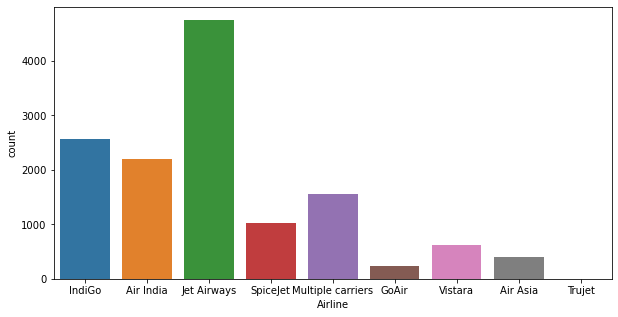

In [38]:
#lets count the different Airplanes data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Airline",data=df_flight)
plt.show()

Here we can see that we have maximum data of Jet Airways flight after that IndiGo and then AirIndo and Trujet have actually almost negligible flights.

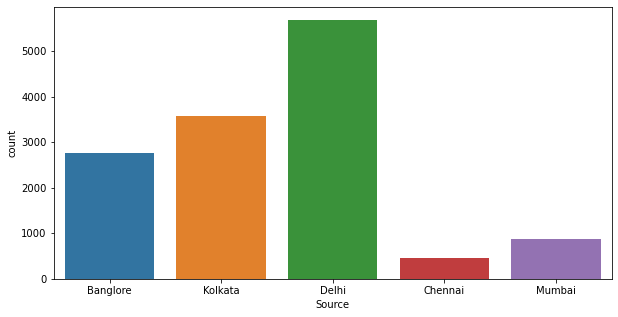

In [39]:
#lets count the different Sources data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Source",data=df_flight)
plt.show()

Here we can see that Maximum flights are generally from Delhi as we concatenated the flight source name of Delhi and New delhi as both are same , after that we have flights from Source name 'Kolkata'

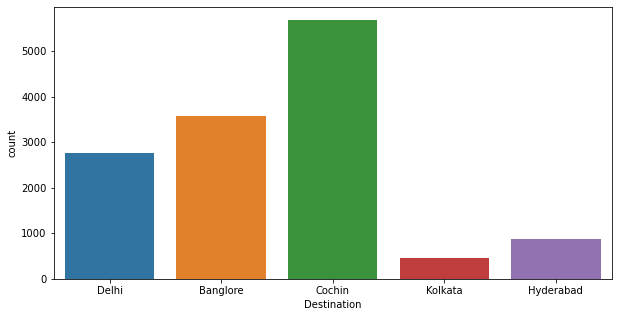

In [40]:
#lets count the different Destination data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Destination",data=df_flight)
plt.show()

- The maximum number of flights are headed to cochin
- and very less headed to kolkata and hyderabad

<AxesSubplot:xlabel='Stop', ylabel='count'>

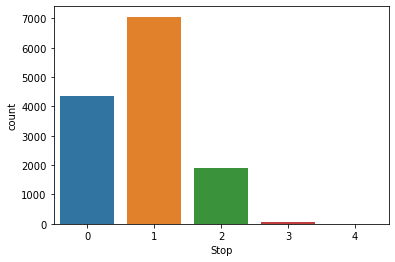

In [41]:
sns.countplot(df_flight['Stop'])
#there are more flights which have 1 stops

- Maximum number of flights have 1 stop before they reach to the destination

#### Airline vs Price Analysis

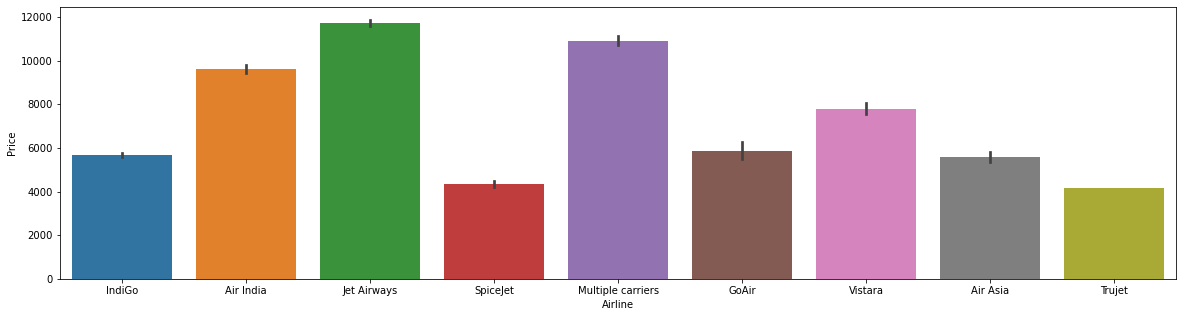

In [42]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.show()

- The jet Airways are the expensive flights, while after Multiple carries airline and AirIndia flights
- Turjet flights and spicejet are very low cost airline

#### Perform Source vs Airline Analysis 

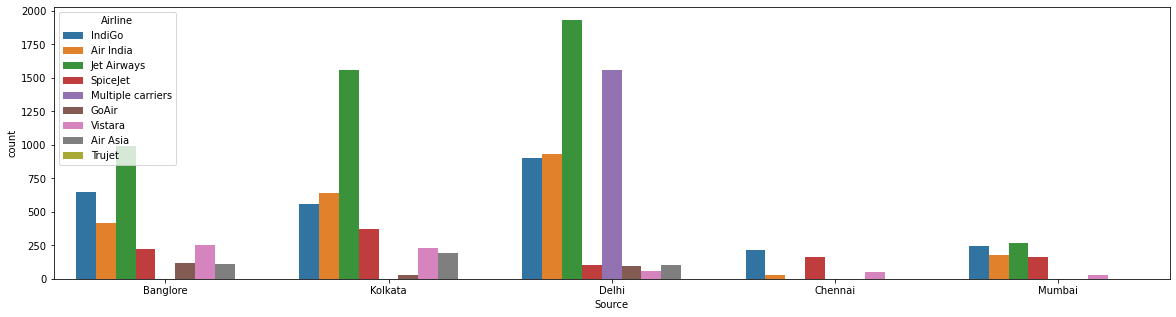

In [43]:
#Lets check the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.show()

- The maximum number of flights are take off from the delhi and they are of Jet Airways
- Jet airways are the maximum nuber of flights which take off from different sources/cites

#### Perform Source vs Price Analysis 

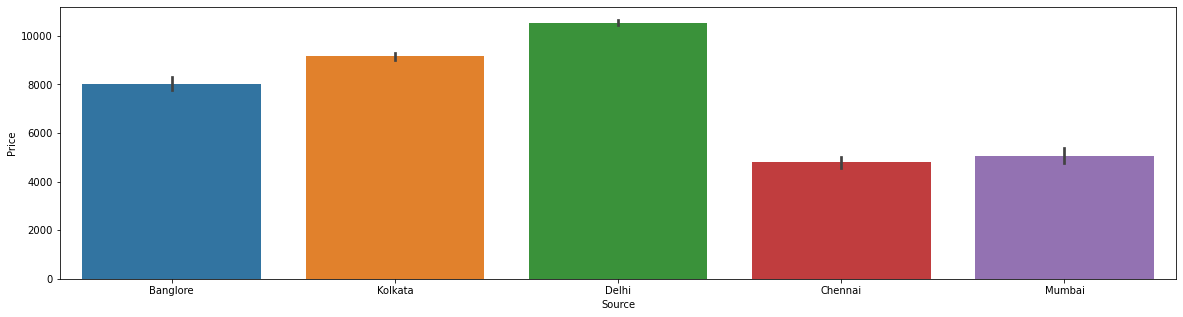

In [44]:
#Lets check from which region averge price of the flight was more
plt.figure(figsize=(20,8))
sns.barplot(x="Source",y="Price",data=df_flight)
plt.show()

The average price of flights are very high in delhi

#### Perform Total_Stops vs Price Analysis 

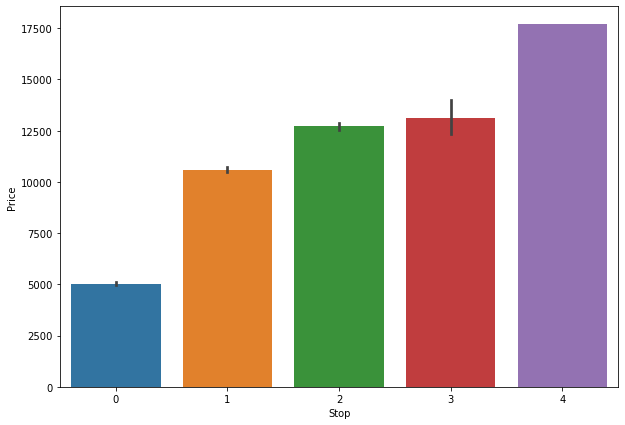

In [45]:
#Lets check from which stops and averge price of the flight was more
plt.figure(figsize=(10,7))
sns.barplot(x="Stop",y="Price",data=df_flight)
plt.show()

The flights which have 4 stops have very high price

In [46]:
#Selecting the route

df_flight['Route_1']=df_flight['Route'].str.split('→ ').str[0]
df_flight['Route_2']=df_flight['Route'].str.split('→ ').str[1]
df_flight['Route_3']=df_flight['Route'].str.split('→ ').str[2]
df_flight['Route_4']=df_flight['Route'].str.split('→ ').str[3]
df_flight['Route_5']=df_flight['Route'].str.split('→ ').str[4]
df_flight.head()

,Airline,Source,Destination,Route,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,...,Arrival_Time_hour,Arrival_Time_min,Stop,dur_hour,dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,BLR → DEL,No Info,3897.0,train,24,3,22,...,1,10,0,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No Info,7662.0,train,5,1,5,...,13,15,2,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No Info,13882.0,train,6,9,9,...,4,25,2,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No Info,6218.0,train,5,12,18,...,23,30,1,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,No Info,13302.0,train,3,1,16,...,21,35,1,4,45,BLR,NAG,DEL,NaN,NaN


In [47]:
df_flight=df_flight.drop(['Route'],axis=1)

In [48]:
df_flight.head()

,Airline,Source,Destination,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop,dur_hour,dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,No Info,3897.0,train,24,3,22,20,1,10,0,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,No Info,7662.0,train,5,1,5,50,13,15,2,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,No Info,13882.0,train,6,9,9,25,4,25,2,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,No Info,6218.0,train,5,12,18,5,23,30,1,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,No Info,13302.0,train,3,1,16,50,21,35,1,4,45,BLR,NAG,DEL,NaN,NaN


### Label encoding

In [49]:
#lets use Label encodig to covert object datatypes to integers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_flight["Airline"]=encoder.fit_transform(df_flight['Airline'])
df_flight["Source"]=encoder.fit_transform(df_flight['Source'])
df_flight["Destination"]=encoder.fit_transform(df_flight['Destination'])
df_flight["Additional_Info"]=encoder.fit_transform(df_flight['Additional_Info'])
df_flight["Route_1"]=encoder.fit_transform(df_flight['Route_1'])
df_flight["Route_2"]=encoder.fit_transform(df_flight['Route_2'])
df_flight["Route_3"]=encoder.fit_transform(df_flight['Route_3'])
df_flight["Route_4"]=encoder.fit_transform(df_flight['Route_4'])
df_flight["Route_5"]=encoder.fit_transform(df_flight['Route_5'])

In [50]:
df_flight.head()

,Airline,Source,Destination,Additional_Info,Price,dataset,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop,dur_hour,dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,2,5,3897.0,train,24,3,22,20,1,10,0,2,50,0,13,30,13,5
1,1,3,0,5,7662.0,train,5,1,5,50,13,15,2,7,25,2,25,1,3,5
2,4,2,1,5,13882.0,train,6,9,9,25,4,25,2,19,0,3,32,4,5,5
3,3,3,0,5,6218.0,train,5,12,18,5,23,30,1,5,25,2,34,3,13,5
4,3,0,2,5,13302.0,train,3,1,16,50,21,35,1,4,45,0,34,8,13,5


In [51]:
df_flight.shape

(13353, 20)

In [52]:
#Lets seprate the train and test from df_flight
train=df_flight.loc[df_flight["dataset"]=="train"]
test=df_flight.loc[df_flight["dataset"]=="test"]

In [53]:
#re indexing the test dataset
test.reset_index(drop=True,inplace=True)

In [54]:
# droping "dataset" columns from the train dataset
train.drop(columns=["dataset"],inplace=True)

In [55]:
#Lets drop "Price" and "dataset" columns from the test dataset

test.drop(columns=["Price","dataset"],inplace=True)


#### Check For Outliers :

In [56]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

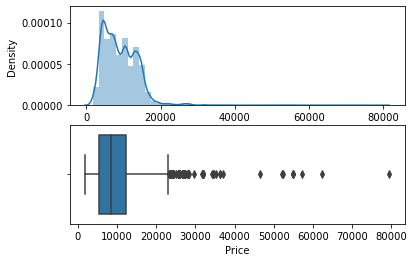

In [57]:
plot(train,'Price')

**Handling outliers:**

As there is some outliers in price feature,so we replace it with median.

In [58]:
train['Price']=np.where(train['Price']>=40000,train['Price'].median(),train['Price'])


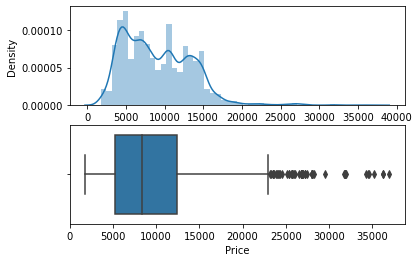

In [60]:
plot(train,'Price')

### Feature Selection :

In [61]:
#lets divide the train dataset into input and output
df_x=train.drop(columns=["Price"])
y=train[["Price"]]

#### Standard Scaler:

In [62]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

In [63]:
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Airline,Source,Destination,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Stop,dur_hour,dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,-0.339212,-1.658359,0.815054,0.424138,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014,-1.220666,-0.970614,1.279041,-1.674190,0.137651,1.397756,0.409744,0.064207
1,-1.456185,0.890014,-1.159411,0.424138,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094,1.741432,-0.381999,-0.196319,-0.016066,1.636517,-1.068027,-2.982402,0.064207
2,0.219275,0.040556,-0.172179,0.424138,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745,1.741432,1.030677,-1.671678,0.812996,2.510856,-0.812946,-2.303973,0.064207
3,-0.339212,0.890014,-1.159411,0.424138,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664,0.260383,-0.617445,-0.196319,-0.016066,2.760667,-0.897973,0.409744,0.064207
4,-0.339212,-1.658359,0.815054,0.424138,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584,0.260383,-0.735168,0.983969,-1.674190,2.760667,-0.472838,0.409744,0.064207


#### Model Building :

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Model Training

In [65]:
model=[LinearRegression(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),
       AdaBoostRegressor(),Lasso(),SVR()]
max_r2_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_scr=r2_score(y_test,pre)
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            final_state = r_state
            final_model= i
print()
print("Max R2 score correspond to random size ",final_state,"is",max_r2_score,"and model is",final_model)


Max R2 score correspond to random size  98 is 0.927518235789754 and model is RandomForestRegressor()


In [67]:
clf=RandomForestRegressor(random_state=98,criterion='mse')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE loss in train : 565.993235434215


### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestRegressor(max_depth=110, n_estimators=600)
0.9008104461019288


In [69]:
Rfr = RandomForestRegressor( max_depth=110, n_estimators=600)
Rfr.fit(x_train,y_train)
pred=Rfr.predict(x_test)
r2_sc= r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 91.07603981113631


In [70]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error:  642.692493941664
Mean Squared Error:  1683573.134243481
RMSE loss in train : 1297.5257740189522


In [71]:
score=cross_val_score(Rfr,x,y,cv=5)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The score after cross_validation :  [0.91297523 0.91505942 0.90754688 0.90611404 0.90569461]
The Mean score after cross_validation :  0.909478034818856


In [72]:
#Applying model on the test set
y_prediction=Rfr.predict(test)

In [73]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(y_prediction,columns=["Price"])

In [74]:
price_pred.head()

,Price
0,7392.061667
1,6450.073333
2,7398.180000
3,6964.436667
4,13234.471667


In [75]:
#Lets save the submission to csv
price_pred.to_csv("Flight_Price_Predictions.csv",index=False)

### Saving the model

In [76]:
#saving the model
model=joblib.dump(Rfr,'Flight_fare_RFR.obj')

- While calculating the best random state the 98 is best state which providing the highest R2 score value for this model.

- After using the RandomizedSearchCV, I can find the best param and then I used these param for that model.

- After using the best param I can get the best R2 score and the model is RandomForestRegressor.

- And then finally we predict the Fare for given Test dataset